In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# you can comment these lines out usually
# if your Jupyter kernel dies after training
# this can help to fix it
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'

<h3>Used the same dataset, but now checked 'Volume' with 'Low'</h3>

In [2]:
df = pd.read_csv('coin_Aave.csv')

In [3]:
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08


In [4]:
df.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,275.000000,275.000000,275.000000,275.000000,275.000000,2.750000e+02,2.750000e+02
mean,138.000000,271.306751,237.736035,254.506688,255.525845,5.023421e+08,3.168639e+09
std,79.529869,173.030432,151.302431,162.067209,161.649917,4.527200e+08,2.066558e+09
min,1.000000,28.433069,25.966155,27.715080,27.715084,0.000000e+00,6.713004e+07
25%,69.500000,85.078206,76.038104,80.557436,81.100120,2.400042e+08,9.736814e+08
50%,138.000000,306.990536,274.746278,292.268571,295.089229,3.693558e+08,3.697227e+09
75%,206.500000,407.518278,361.685763,382.275163,382.579255,6.204643e+08,4.784464e+09
max,275.000000,666.864979,565.749887,629.231665,632.266488,2.838573e+09,8.063210e+09


In [5]:
df = df.drop(["Name", "Symbol"], axis=1)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
# scale only relevant variables
num_cols = ["Volume", "Low"]
df[num_cols] = scaler.fit_transform(df[num_cols])

In [8]:
df = df.drop(["Date", "Close", "High", "Open", "Marketcap"], axis=1)
# remove not needed columns

In [9]:
df.head()

,SNo,Low,Volume
0,1,0.044132,0.000000
1,2,0.027360,0.000205
2,3,0.018534,0.000241
3,4,0.019878,0.000584
4,5,0.032097,0.000287


In [10]:
df = pd.melt(df, id_vars=["SNo"], value_vars=["Volume", "Low"],
             var_name="class", value_name="price")

In [11]:
df.head(10)

,SNo,class,price
0,1,Volume,0.000000
1,2,Volume,0.000205
2,3,Volume,0.000241
3,4,Volume,0.000584
4,5,Volume,0.000287
5,6,Volume,0.000379
6,7,Volume,0.000244
7,8,Volume,0.000477
8,9,Volume,0.000488
9,10,Volume,0.001104


In [12]:
df['class'] = df['class'].replace({"Low": 0, "Volume": 1})
# replaced classes numbers

In [13]:
class_names = np.array(["Low", "Volume"])
num_classes = len(class_names)
classes = [0, 1]

In [14]:
df_class_1 = df[df['class'] == 0]
df_class_2 = df[df['class'] == 1]

# combine into a list for easier iteration
# WHEN WE DO THE TIMESTEP SPLIT
splitted_dfs = [df_class_1, df_class_2] 

In [15]:
df_class_1['class'].value_counts()

class
0    275
Name: count, dtype: int64

In [16]:
df_class_2['class'].value_counts()

class
1    275
Name: count, dtype: int64

In [17]:
max_size = 275
time_step_size = 25

# x_total is going to be the signal 
x_total = []
y_total = []

# built x_total and y_total for all categories (2 at this point)
for category in classes:
    # we will start cutting the original signal data
    # starting from index 0
    index_cutoff = 0

    while index_cutoff / max_size < 1:
        timestep = []

        # take a slice of 50 points, starting from cutoff until cutoff + 50
        slice = splitted_dfs[category].iloc[index_cutoff:index_cutoff + time_step_size]
        
        # take a slice of selected category / signal type
        # and place it in x_total and y_total
        x_total.append(list(slice['price']))
        y_total.append(category)

        # after each slicing operation, increase the cutoff
        # by 50 (step size), otherwise we get an infinite
        index_cutoff += time_step_size

In [18]:
# slice = splitted_dfs[category].iloc[index_cutoff:index_cutoff + time_step_size]

In [19]:
 # we have now 50 signals, 25 for each category
len(x_total)

22

In [20]:
# we also have 50 TARGET VALUES, 25 for each category
len(y_total)

22

In [21]:
y_total[5]

0

In [22]:
len(x_total[0])

25

In [23]:
import random
zipped = list(zip(x_total, y_total))
random.shuffle(zipped)
x_total, y_total = zip(*zipped)

In [24]:
x_total = np.array(x_total)
y_total = np.array(y_total)

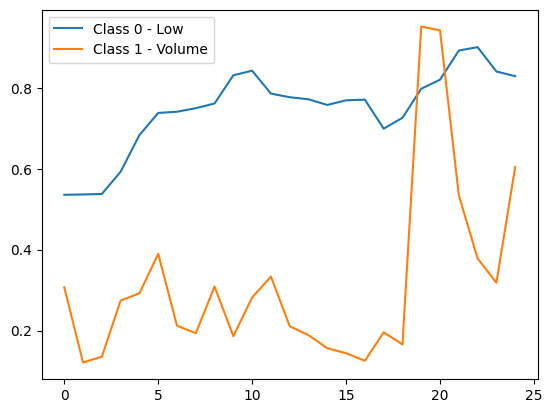

In [25]:
test_signal_index = 2

c_x_train = x_total[y_total == 0]
plt.plot(c_x_train[test_signal_index], label="Class 0 - Low")

c_x_train = x_total[y_total == 1]
plt.plot(c_x_train[test_signal_index], label="Class 1 - Volume")
plt.legend()

In [26]:
 # let's make a helper variabel to split our dataset
train_size = 0.7
splitter = int(len(x_total) * train_size)

# split by the index
x_train = x_total[0:splitter]
x_test = x_total[splitter:]
y_train = y_total[0:splitter]
y_test = y_total[splitter:]

In [27]:
#train test split
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x_total, y_total, test_size=0.2, random_state=42)

In [28]:
x_train

array([[4.83912073e-01, 6.02852312e-01, 4.10591786e-01, 6.62521507e-01,
        2.94752249e-01, 2.89849013e-01, 2.76038940e-01, 2.41422040e-01,
        4.06227477e-01, 3.26760204e-01, 3.86080817e-01, 2.03430129e-01,
        2.34997535e-01, 5.32785429e-01, 1.95858201e-01, 3.25661649e-01,
        4.15597663e-01, 2.68985154e-01, 1.58757110e-01, 1.93469880e-01,
        1.40999060e-01, 2.09846907e-01, 2.61842948e-01, 2.57704035e-01,
        1.50876666e-01],
       [7.21009895e-01, 9.14709304e-01, 5.24952803e-01, 4.31206994e-01,
        3.10264336e-01, 4.18365683e-01, 4.18544824e-01, 3.01786101e-01,
        2.87362246e-01, 2.20968375e-01, 2.43641788e-01, 1.62714128e-01,
        1.42658614e-01, 2.41399276e-01, 2.11253143e-01, 1.44623468e-01,
        1.25969082e-01, 1.51950049e-01, 1.26118517e-01, 7.18934200e-02,
        1.26100324e-01, 1.43263970e-01, 1.31111120e-01, 8.62948061e-02,
        8.81183503e-02],
       [1.00000000e+00, 6.08562549e-01, 6.10366499e-01, 5.27108089e-01,
        5.2953

In [29]:
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [30]:
def make_model(input_shape):
    model = keras.Sequential(
        [
            keras.layers.Input(input_shape),

            # one convolutional layer package
            keras.layers.Conv1D(filters=24, kernel_size=5, padding="same", activation="relu"),
            #keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.6),
            keras.layers.MaxPooling1D(pool_size=2),
            keras.layers.Conv1D(filters=48, kernel_size=3, padding="same", activation="relu"),
            # keras.layers.Dropout(0.7),
            keras.layers.MaxPooling1D(pool_size=2),
            keras.layers.Conv1D(filters=96, kernel_size=3, padding="same", activation="relu"),
            keras.layers.Dropout(0.8),
            keras.layers.Flatten(),

            # our normal neural network after flattening
            keras.layers.Dense(288, activation="relu"),

            # output layer
            keras.layers.Dense(num_classes, activation="softmax")
        ]
    )
    
    return model


model = make_model(input_shape=x_train.shape[1:])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 25, 24)            144       
                                                                 
 dropout (Dropout)           (None, 25, 24)            0         
                                                                 
 max_pooling1d (MaxPooling1  (None, 12, 24)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 12, 48)            3504      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 6, 48)             0         
 g1D)                                                            
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 96)             1

In [32]:
epochs = 700
batch_size = 8

# useful callbacks typically for time series
# or CNN in general
callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
]

# usual combination
# this example uses sparse categorical crossentropy
opt = keras.optimizers.Adam(learning_rate=0.0001)

model.compile(
    optimizer=opt,
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

# train the model
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(x_test, y_test),
    verbose=1,
)

Epoch 1/700


2/2 [==============================] - 1s 250ms/step - loss: 0.7425 - sparse_categorical_accuracy: 0.3333 - val_loss: 0.6895 - val_sparse_categorical_accuracy: 0.7143
Epoch 2/700
2/2 [==============================] - 0s 33ms/step - loss: 0.7366 - sparse_categorical_accuracy: 0.4000 - val_loss: 0.6905 - val_sparse_categorical_accuracy: 0.8571
Epoch 3/700
2/2 [==============================] - 0s 17ms/step - loss: 0.7525 - sparse_categorical_accuracy: 0.2667 - val_loss: 0.6917 - val_sparse_categorical_accuracy: 0.8571
Epoch 4/700
2/2 [==============================] - 0s 34ms/step - loss: 0.7206 - sparse_categorical_accuracy: 0.2000 - val_loss: 0.6927 - val_sparse_categorical_accuracy: 0.2857
Epoch 5/700
2/2 [==============================] - 0s 50ms/step - loss: 0.7320 - sparse_categorical_accuracy: 0.2000 - val_loss: 0.6937 - val_sparse_categorical_accuracy: 0.2857
Epoch 6/700
2/2 [==============================] - 0s 33ms/step - loss: 0.7361 - sparse_categorical_accurac

<Axes: >

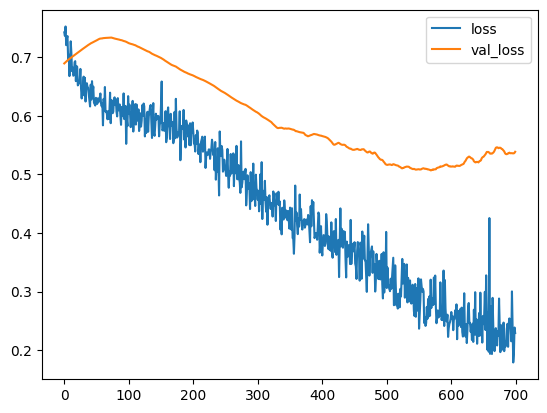

In [33]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()

<Axes: >

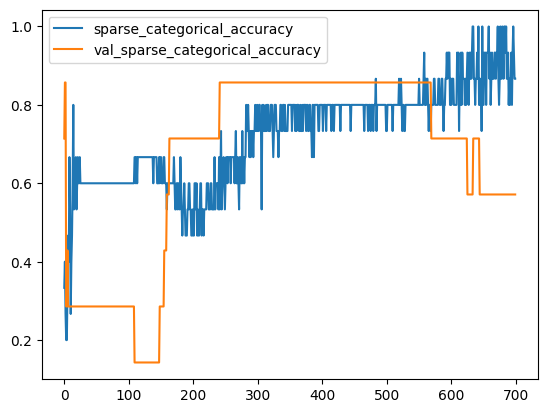

In [34]:
loss_df[['sparse_categorical_accuracy', 'val_sparse_categorical_accuracy']].plot()

In [35]:
 # load up the best version of the model
model = keras.models.load_model("best_model.keras")

# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

1/1 [==============================] - 0s 217ms/step - loss: 0.5069 - sparse_categorical_accuracy: 0.8571
Test accuracy 0.8571428656578064
Test loss 0.5069445371627808


In [36]:
 # make predictions and use argmax
test_predictions = model.predict(x_test)
test_predictions = np.argmax(test_predictions, axis=1)

1/1 [==============================] - 0s 98ms/step


<Axes: >

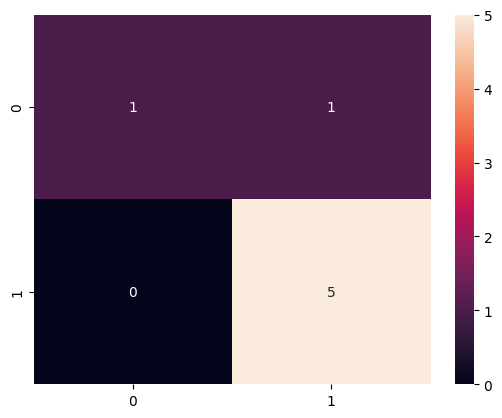

In [37]:
 # confusion matrix
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

In [38]:
print(classification_report(y_test, test_predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

# this model is a bit better than the previous one, 86% accuracy

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7


Model overall accuracy: 85.71%


In [ ]:
roc_auc_score(y_test, model.predict(x_test)[:, 1])